# Python skills for research in Hydrology
## Lesson 2 (advanced): working with NetCDF files
  
  
Original notebook by Stephan Hoyer, Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and Fabien Maussion for EGU General Assembly 2017, Vienna, Austria.   
Adapted by Timothy Tiggeloven for the series 'Python skills for research in Hydrology' for the master Hydrology at the Vrije Universiteit Amsterdam (2019).

# Advanced topics

![](./data/figures/dask-vis.png)

# Structure of this tutorial

1. Operations and computation
2. Groupby and "split-apply-combine"
3. Graphics



# 1. Operations and computation

* We can do arithmetic directly on `Dataset` and `DataArray` objects. 
* Labels are preserved and dataArray dimensions automatically aligned.

### Broadcasting

<img src="./data/figures/broadcast.png" width="50%" align="left"> 

In [66]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':np.arange(3)})
b = xr.DataArray(np.arange(4), dims='space', 
                 coords={'space':np.arange(4)})
a + b

<xarray.DataArray (time: 3, space: 4)>
array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5]])
Coordinates:
  * time     (time) int64 0 1 2
  * space    (space) int64 0 1 2 3

### Alignment

<img src="./data/figures/align.png" width="50%" align="left"> 

In [67]:
atime = np.arange(3)
btime = np.arange(5) + 1
atime, btime

(array([0, 1, 2]), array([1, 2, 3, 4, 5]))

In [68]:
a = xr.DataArray(np.arange(3), dims='time', 
                 coords={'time':atime})
b = xr.DataArray(np.arange(5), dims='time', 
                 coords={'time':btime})
a + b

<xarray.DataArray (time: 2)>
array([1, 3])
Coordinates:
  * time     (time) int64 1 2

### Aggregation


In [69]:
ds.max()

<xarray.Dataset>
Dimensions:     ()
Data variables:
    air         float32 317.4
    centigrade  float32 28.485992
    kelvin      float32 301.646

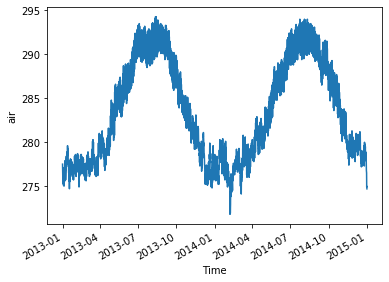

In [70]:
ds.air.median(dim=['lat', 'lon']).plot();

### Masking with `.where()`

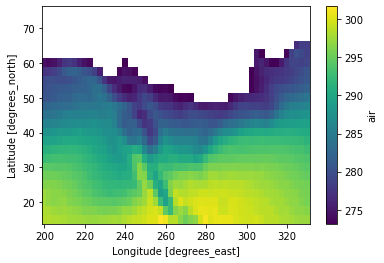

In [71]:
means = ds.air.mean(dim=['time'])
means.where(means > 273.15).plot();

# 2. Groupby and "split-apply-combine"

Xarray implements the "split-apply-combine" paradigm with `groupby`. This works really well for calculating climatologies:

In [72]:
ds.air.groupby('time.season').mean()

<xarray.DataArray 'air' (season: 4)>
array([273.64966, 289.20493, 278.99133, 283.02805], dtype=float32)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

<img src="./data/figures/split_apply-combine.png" alt="split" style="width: 50%;"/>

In [73]:
ds.air.groupby('time.month').mean('time')

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[246.34987, 246.38608, ..., 244.08795, 245.6467 ],
        [248.8576 , 248.90733, ..., 243.50865, 246.75471],
        ...,
        [296.5446 , 296.46982, ..., 295.0812 , 294.53006],
        [297.15417, 297.2383 , ..., 295.77554, 295.63647]],

       [[246.67715, 246.40576, ..., 243.0021 , 244.44383],
        [247.8001 , 247.75992, ..., 242.26633, 245.06662],
        ...,
        [296.78754, 296.63443, ..., 294.2178 , 293.70258],
        [297.2889 , 297.2165 , ..., 294.9558 , 294.87967]],

       ...,

       [[253.74484, 253.64487, ..., 243.9345 , 245.14209],
        [259.12967, 258.62927, ..., 243.07965, 245.46625],
        ...,
        [298.58783, 298.42026, ..., 298.19397, 297.9083 ],
        [298.81143, 298.8566 , ..., 298.7519 , 298.8189 ]],

       [[247.971  , 248.02118, ..., 241.02383, 242.62823],
        [249.73361, 250.16037, ..., 240.96469, 244.11626],
        ...,
        [297.46814, 297.38025, ..., 296.84668, 2

In [74]:
clim = ds.air.groupby('time.month').mean('time')

You can also do arithmetic with groupby objects, which repeats the arithmetic over each group:

In [75]:
anomalies = ds.air.groupby('time.month') - clim

In [76]:
anomalies

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[ -5.149872,  -3.886078, ...,  -8.587952,  -7.046707],
        [ -5.057617,  -4.407333, ...,  -8.208664,  -7.454727],
        ...,
        [ -0.644592,  -0.269836, ...,   0.818787,   0.669922],
        [ -0.864166,  -0.448303, ...,   1.014465,   0.963531]],

       [[ -4.249878,  -3.686081, ..., -10.487961,  -9.84671 ],
        [ -5.257614,  -4.807343, ..., -11.008652, -11.054718],
        ...,
        [ -0.344604,   0.230164, ...,   0.418793,   0.569946],
        [ -0.864166,  -0.03833 , ...,   0.624451,   0.963531]],

       ...,

       [[ -2.181   ,  -3.231186, ...,   2.966156,   2.161758],
        [  0.156387,  -0.870377, ...,   1.525299,   0.173737],
        ...,
        [ -1.178131,  -0.190247, ...,  -1.756683,  -2.131348],
        [ -0.090881,   0.403198, ...,  -2.0755  ,  -2.347626]],

       [[ -2.880997,  -3.731186, ...,   0.466156,  -0.838242],
        [  0.156387,  -0.870377, ...,  -0.674698,  -2.42627 ],
    

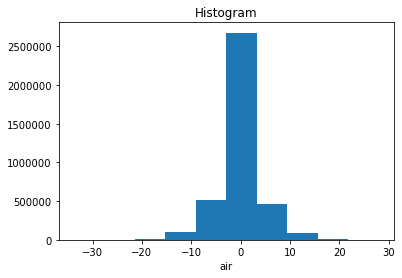

In [77]:
anomalies.plot();

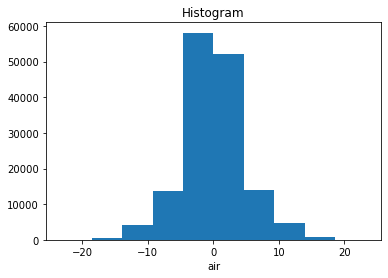

In [78]:
anomalies.sel(time= '2013-02').plot();  # Find all the anomolous values for February

Resample adjusts a time series to a new resolution:

In [79]:
tmin = ds.air.resample(time='1D').min()  # Resample to one day '1D
tmax = ds.air.resample(time='1D').max()

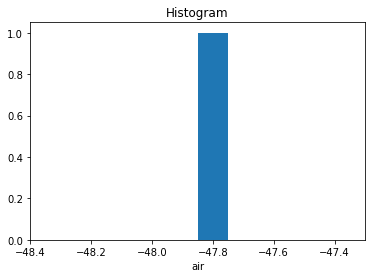

In [80]:
(tmin.sel(time='2013-02-15') - 273.15).plot();

In [81]:
ds_extremes = xr.Dataset({'tmin': tmin, 'tmax': tmax})

In [82]:
ds_extremes

<xarray.Dataset>
Dimensions:  (time: 730)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31
Data variables:
    tmin     (time) float32 227.0 232.39 ... 236.68999 230.48999
    tmax     (time) float32 302.9 302.1 302.5 ... 302.5 302.59

# 3. Graphics 

``xarray`` plotting functions rely on matplotlib internally, but they make use of all available metadata to make the plotting operations more intuitive and interpretable.

### 1D plots

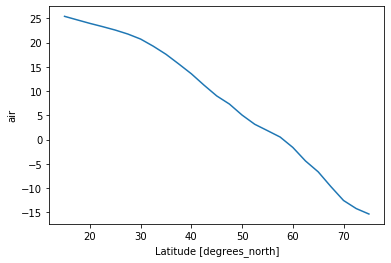

In [83]:
zonal_t_average = ds.air.mean(dim=['lon', 'time']) - 273.15
zonal_t_average.plot();  # 1D arrays are plotted as line plots

### 2D plots 

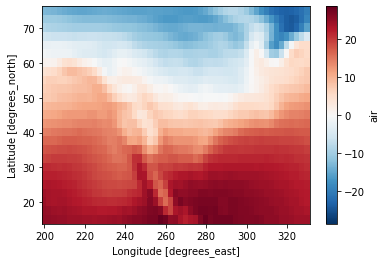

In [84]:
t_average = ds.air.mean(dim='time') - 273.15
t_average.plot();  # 2D arrays are plotted with pcolormesh

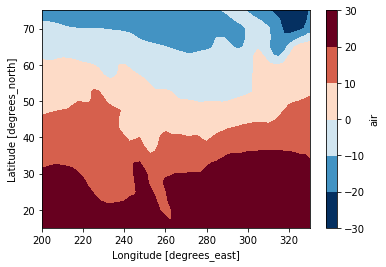

In [85]:
t_average.plot.contourf();  # but you can use contour(), contourf() or imshow() if you wish

### Customizing 2d plots

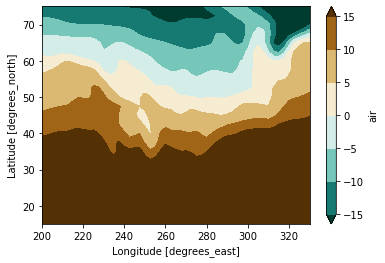

In [86]:
t_average.plot.contourf(cmap='BrBG_r', vmin=-15, vmax=15);

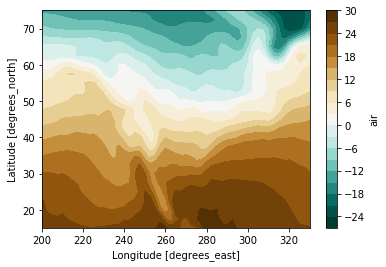

In [87]:
t_average.plot.contourf(cmap='BrBG_r', levels=22, center=False);

### Dealing with Outliers

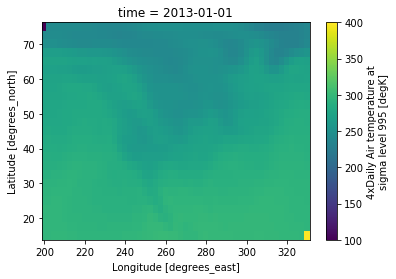

In [88]:
air_outliers = ds.air.isel(time=0).copy()
air_outliers[0, 0] = 100
air_outliers[-1, -1] = 400
air_outliers.plot();  # outliers mess with the datarange and colorscale!

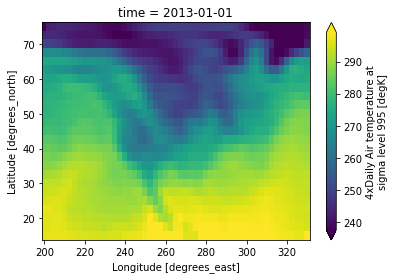

In [89]:
# Using `robust=True` uses the 2nd and 98th percentiles of the data to compute the color limits.
air_outliers.plot(robust=True);

### Facet plots 

In [90]:
t_season = ds.air.groupby('time.season').mean(dim='time') - 273.15

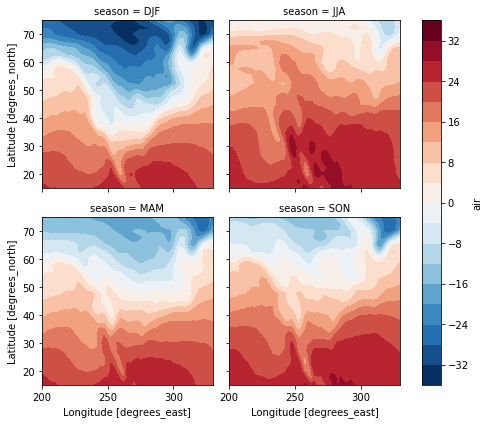

In [91]:
# facet plot allows to do multiplot with the same color mappings
t_season.plot.contourf(x='lon', y='lat', col='season', col_wrap=2, levels=22);

### Plotting on maps

For plotting on maps, we rely on the excellent [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) library.

In [92]:
import cartopy.crs as ccrs

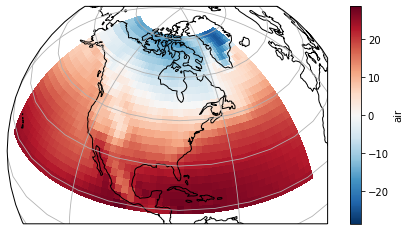

In [93]:
f = plt.figure(figsize=(8, 4))
# Define the map projection *on which* you want to plot
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
# ax is an empty plot. We now plot the variable t_average onto ax
# the keyword "transform" tells the function in which projection the air temp data is stored 
t_average.plot(ax=ax, transform=ccrs.PlateCarree())
# Add gridlines and coastlines to the plot
ax.coastlines(); ax.gridlines(); 

#### Facet plots on maps

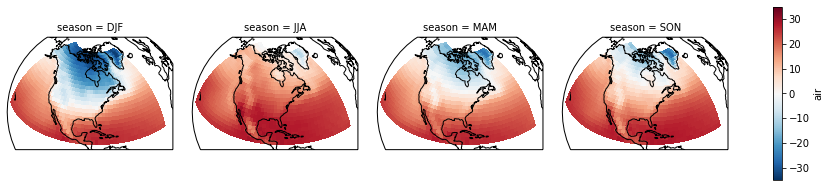

In [94]:
# this time we need to retrieve the plots to do things with the axes later on
p = t_season.plot(x='lon', y='lat', col='season', transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.Orthographic(-80, 35)})
for ax in p.axes.flat:
    ax.coastlines()

# xarray can do more!

* out of core computations
* concatentaion
* open network located files with openDAP
* import and export Pandas DataFrames
* .nc dump to 
* groupby_bins
* resampling and reduction

For more details, read this blog post: http://continuum.io/blog/xray-dask
